In [1]:
import os
import six
import glob
import pickle

import numpy as np
import pandas as pd

import p2pspatial
import pulse2percept.utils as p2pu

import skimage
import skimage.transform as skit
from sklearn.base import clone

%matplotlib inline
import matplotlib.pyplot as plt

/home/mbeyeler/anaconda3/lib/python3.5/site-packages/skvideo/__init__.py:356: UserWarning: avconv/avprobe not found in path: 
  warnings.warn("avconv/avprobe not found in path: " + str(path), UserWarning)
2018-02-02 22:54:53,779 [pulse2percept] [INFO] Welcome to pulse2percept


In [44]:
file = '../../results/newLOO/A-crossval-swarm_12-005_2018-01-30_07-25-57.pickle'
y_test, y_pred, best_params, specifics = pickle.load(open(file, 'rb'))

In [45]:
from functools import reduce
y_test = reduce(lambda x, y: pd.concat((x, y)), y_test)
y_pred = reduce(lambda x, y: pd.concat((x, y)), y_pred)

'../../results/newLOO/A-crossval-swarm_12-005_2018-01-30_07-25-57.pickle'

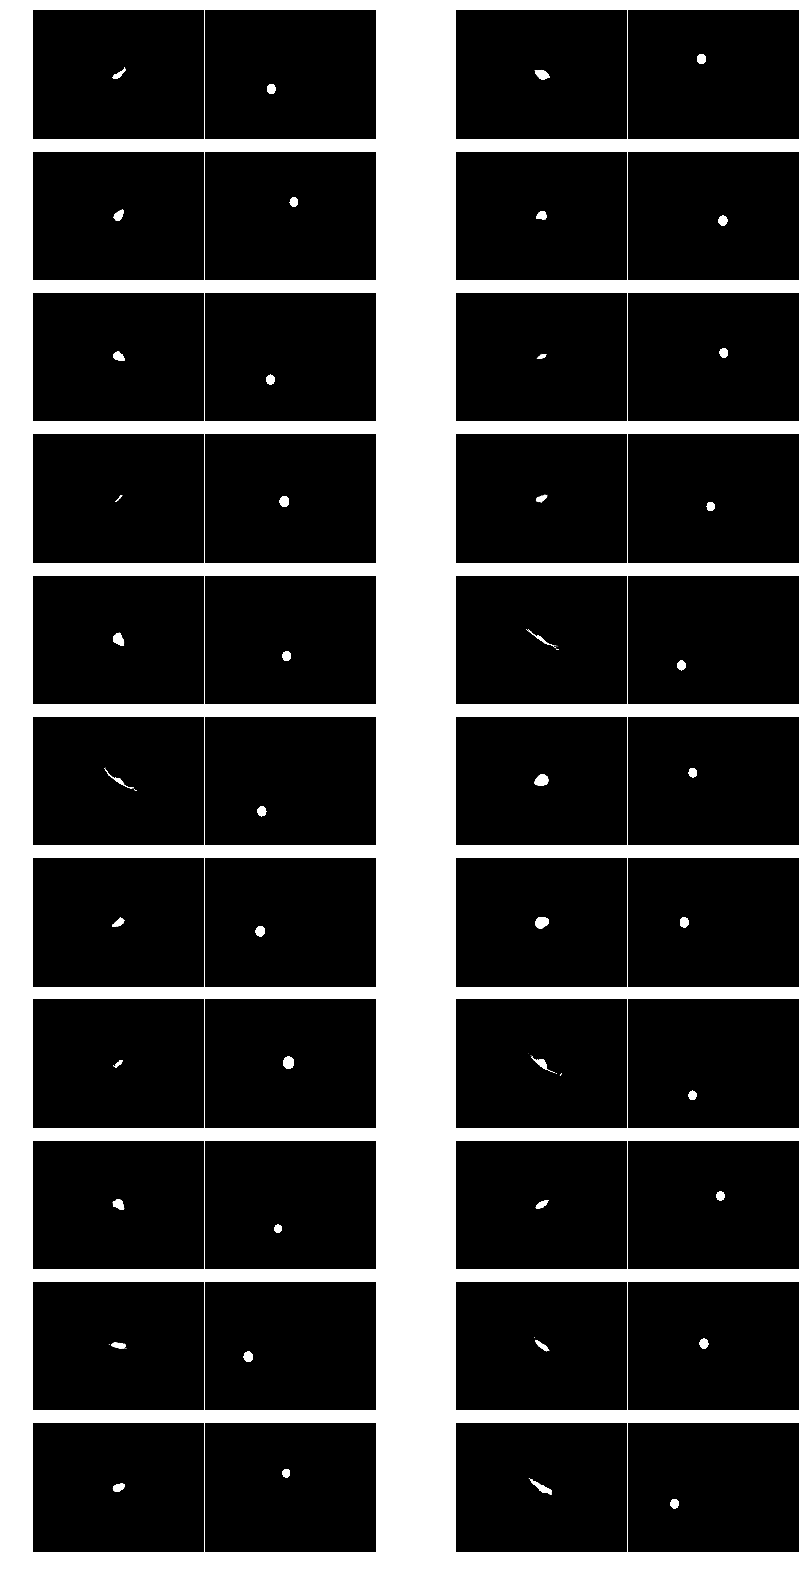

In [46]:
ncols = 2
nrows = int(np.ceil(len(y_test) / ncols))
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12, nrows * 2), squeeze=True)
for ax in axes.ravel():
    ax.axis('off')
for yt, yp, ax in zip(y_test.iterrows(), y_pred.iterrows(), axes.ravel()):
    img_yt = skimage.img_as_float(yt[1]['image'])
    img_yp = skit.resize(yp[1]['image'], img_yt.shape, mode='reflect')

    img = np.column_stack((img_yt, np.ones((img_yt.shape[0], 1)), img_yp))
    ax.imshow(img, cmap='gray')
    ax.axis('off')
fig.tight_layout()
fig.subplots_adjust(wspace=0.01, hspace=0.1)
file